# Stack Overflow Survey 2020


We analyze the Stack Overflow survey for Germany. It contains over 3890 respondents from developers, analysts, data scientists.

- you can download it [here](https://insights.stackoverflow.com/survey)
- get insights [here](https://insights.stackoverflow.com/survey/2020)

The dataset is an option for the final project.


Questions:
- What kind of information does the survey contain? 
- Which variables are particularly interesting to you and why? 
- Analyze the salary and how different variables are correlating with it.

<font color='green'>Step 1: Goal!
- see https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d from ref. (2)
- think in terms of statistical plan (multiple comparisons problem)
</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.decomposition import PCA

# Query the data from the Database

<font color='green'>Step 2: Get the data
- see ref (1), but get ready for anything including a whole PhD. May be ask IT/the dev.Team, about apparently unsurmountable obstacles.
</font> 

In [2]:
df_survey=pd.read_csv(r'C:\Users\Uyoyo\Desktop\survey_results_public.csv')
df_survey.head(2)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


In [3]:
df_survey.shape

(83439, 48)

In [4]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

## Data cleaning

No data missing.                        ## code to check missing data:-  df.isna().sum()

In [5]:
#(df_survey.isnull().sum() / len(df)).sort_values(ascending = False)

In [6]:
#df_survey=df_survey.columns[1::]    ### I removed the column-ResponseID, i dont need it
#df_survey.head()

In [7]:
df_survey.isna().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

## A. Dropping columns that are not important for now.

to answer questions just on occupation and skills, i dropped gender,sexuality and trans-(Are you transgender?).


In [8]:
df=df_survey.drop(columns=['ResponseId','Gender','Sexuality','Trans'])
df.head(2)


,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,SOPartFreq,SOComm,NEWOtherComms,Age,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,A few times per month or weekly,"Yes, definitely",No,25-34 years old,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,...,Daily or almost daily,"Yes, definitely",No,18-24 years old,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


In [9]:
df.corr()              # Correlation is only between the float columns here,which is :CompTotal	and ConvertedCompYearly

,CompTotal,ConvertedCompYearly
CompTotal,1.000000,0.148269
ConvertedCompYearly,0.148269,1.000000


### General conclusion without proper investigation or analysizing

1. The total number of people that took the survey were 83,439.

2. In terms of employment; people were emploed full_time, have Student full_time jobs. Although other employment status options were in the survey.

3. Most of people who took the survey were "25-44" years of age followed by "under 18" years, "45-54" years etc.

4. The first time they coded were mostly at age between "11-17" years mostly; followed by "18-24" years, "5-10" years.

In [10]:
df.Age.unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       'Prefer not to say', '45-54 years old', 'Under 18 years old',
       '65 years or older', '55-64 years old', nan], dtype=object)

In [11]:
df.Age.value_counts()

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [12]:
df.MainBranch.value_counts()

I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: MainBranch, dtype: int64

In [13]:
df.Employment.value_counts()           

Employed full-time                                      53584
Student, full-time                                      11781
Independent contractor, freelancer, or self-employed     8041
Not employed, but looking for work                       2961
Employed part-time                                       2461
Student, part-time                                       2051
Not employed, and not looking for work                   1228
I prefer not to say                                       890
Retired                                                   326
Name: Employment, dtype: int64

[Text(0.5, 1.0, 'Six(6) categories of Survey participants')]

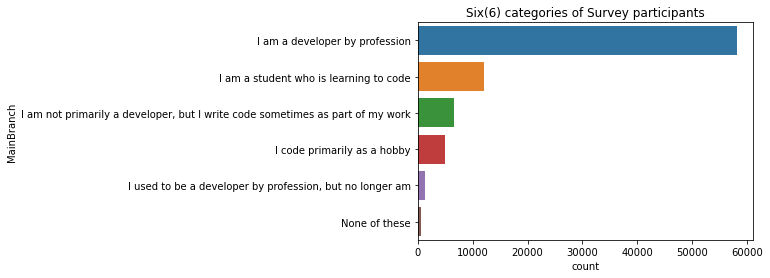

In [14]:
sns.countplot(y='MainBranch',data=df).set(title="Six(6) categories of Survey participants")

<AxesSubplot:ylabel='MainBranch'>

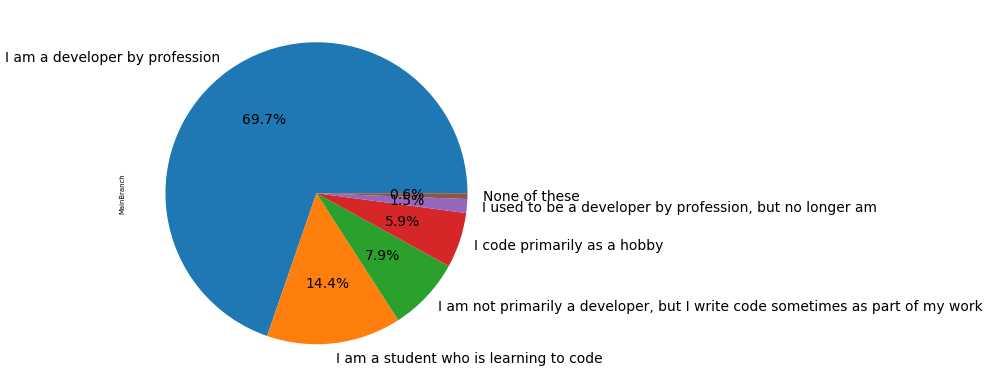

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=50)


df.MainBranch.value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 20})

[Text(0.5, 1.0, 'Employment Status during Survey')]

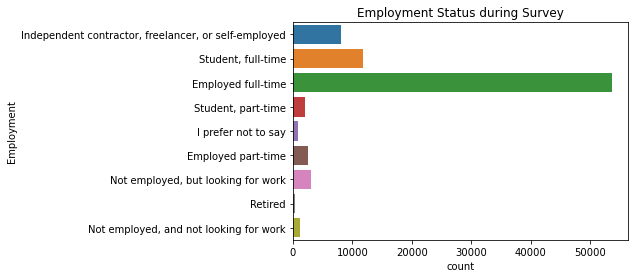

In [16]:
sns.countplot(y='Employment',data=df).set(title="Employment Status during Survey")

<AxesSubplot:ylabel='Employment'>

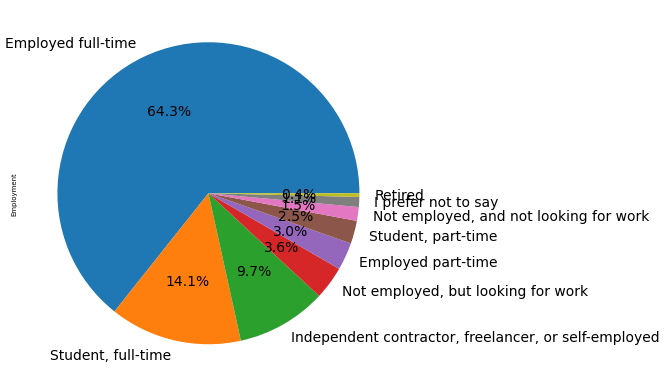

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=50)


df.Employment.value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 20})

[Text(0.5, 1.0, 'Age of Survey participants')]

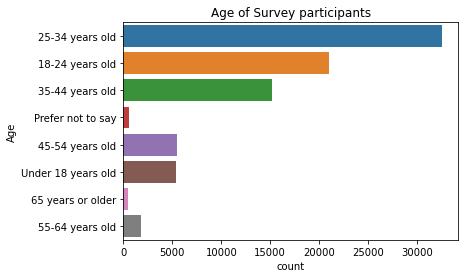

In [18]:
sns.countplot(y='Age',data=df).set(title="Age of Survey participants")

<AxesSubplot:ylabel='Age'>

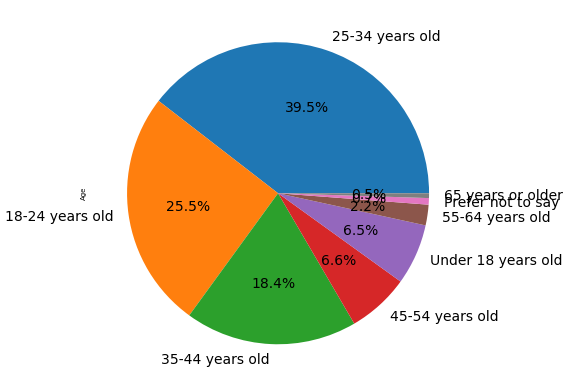

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=50)


df.Age.value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 20})

[Text(0.5, 1.0, 'First coded Age')]

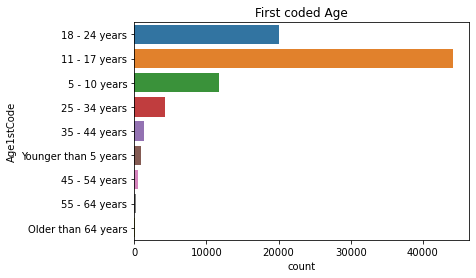

In [20]:
sns.countplot(y='Age1stCode',data=df).set(title="First coded Age")

<AxesSubplot:ylabel='Age1stCode'>

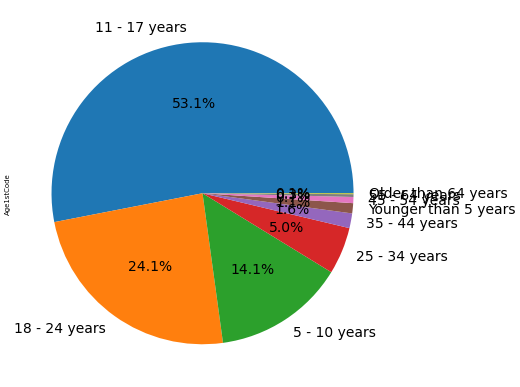

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=50)


df.Age1stCode.value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 20})

## B. Coverting strings to numerical values

### YearsCodePro...........is experience coding professionally

Get the list of non-numeric values for YearsCodePro

In [22]:
df.YearsCodePro.describe()

count     61216
unique       52
top           3
freq       5812
Name: YearsCodePro, dtype: object

In [23]:
df.YearsCodePro.unique()

array([nan, '10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1',
       '16', 'Less than 1 year', '15', '3', '35', '7', '8', '17', '14',
       '26', '25', '20', '50', '34', '11', '24', '22', '13', '31', '23',
       '39', '41', '27', '28', '19', '33', 'More than 50 years', '37',
       '29', '32', '43', '40', '38', '45', '42', '46', '36', '44', '47',
       '48', '49'], dtype=object)

In [24]:
def is_float(value):
    try:
        float(value)
        return True
    except:
        return False

df.YearsCodePro[df.YearsCodePro.apply(lambda x: not is_float(x))].unique()

array(['Less than 1 year', 'More than 50 years'], dtype=object)

In [25]:
str_YearsCodePro_map = {
    'nan': '0',
    'Less than 1 year': '0.9',
    'More than 50 years': 51,  
}

In [26]:
df['YearsCodePro'] = df.YearsCodePro.apply(lambda x: str_YearsCodePro_map.get(x, x)) #Command/"get" is an API term
df.YearsCodePro.unique()           #API is Application Programming Interface

array([nan, '10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1',
       '16', '0.9', '15', '3', '35', '7', '8', '17', '14', '26', '25',
       '20', '50', '34', '11', '24', '22', '13', '31', '23', '39', '41',
       '27', '28', '19', '33', 51, '37', '29', '32', '43', '40', '38',
       '45', '42', '46', '36', '44', '47', '48', '49'], dtype=object)

In [27]:
df_yearpro=df.query('YearsCodePro!="More than 50 years" & YearsCodePro!="Less than 1 year" & YearsCodePro!="Nan"')
yr_pro=df_yearpro[['MainBranch','YearsCodePro']]
yr_pro

,MainBranch,YearsCodePro
0,I am a developer by profession,NaN
1,I am a student who is learning to code,NaN
2,"I am not primarily a developer, but I write co...",NaN
3,I am a developer by profession,NaN
4,I am a developer by profession,10
...,...,...
83434,I am a developer by profession,5
83435,I am a developer by profession,2
83436,I am a developer by profession,4
83437,I am a developer by profession,3


In [28]:
#yr_pro.query('MainBranch')[['YearsCodePro']].mean()

dp_proyr=yr_pro.query('MainBranch=="I am a developer by profession" & YearsCodePro != "nan"')
dp_proyr

,MainBranch,YearsCodePro
0,I am a developer by profession,NaN
3,I am a developer by profession,NaN
4,I am a developer by profession,10
8,I am a developer by profession,4
9,I am a developer by profession,4
...,...,...
83434,I am a developer by profession,5
83435,I am a developer by profession,2
83436,I am a developer by profession,4
83437,I am a developer by profession,3


<AxesSubplot:ylabel='YearsCodePro'>

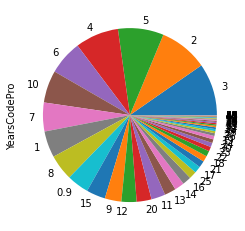

In [29]:
#dp_proyr.plot.pie(y='YearsCodePro', figsize=(5, 5))

#plt.figure(figsize=(16,8))
# plot chart
#ax1 = plt.subplot(121, aspect='equal')
#df.plot(kind='pie', y = 'YearsCodePro', ax=ax1, autopct='%1.1f%%', 
# startangle=90, shadow=False, labels=dp_proyr['MainBranch'], legend = False, fontsize=14)

#plt.show()

dp_proyr.YearsCodePro.value_counts().plot(kind='pie')

In [30]:
#yr_pro.query(['MainBranch=="I am a developer by profession"']).value_counts()

### Question 1: How many developers by profession have full time jobs?

In [31]:
df_full=df.query('MainBranch=="I am a developer by profession" & Employment=="Employed full-time"')
df_fullemploy=df_full[['MainBranch','Employment']]
print(f' Developers by profession with full_time jobs are {len(df_fullemploy)} from total of 58,153 developers by profession in the survey.')


 Developers by profession with full_time jobs are 46884 from total of 58,153 developers by profession in the survey.


In [32]:
df_employ=df[['MainBranch','Employment']]
df_employ

,MainBranch,Employment
0,I am a developer by profession,"Independent contractor, freelancer, or self-em..."
1,I am a student who is learning to code,"Student, full-time"
2,"I am not primarily a developer, but I write co...","Student, full-time"
3,I am a developer by profession,Employed full-time
4,I am a developer by profession,"Independent contractor, freelancer, or self-em..."
...,...,...
83434,I am a developer by profession,Employed full-time
83435,I am a developer by profession,"Independent contractor, freelancer, or self-em..."
83436,I am a developer by profession,Employed full-time
83437,I am a developer by profession,Employed full-time


In [33]:
df_employ1=df_employ.query('Employment !="nan" & MainBranch!="None of these" & Employment !="I prefer not to say"')
df_employ1

#Char_a=df.query('Region=="Charlottenburg" & Rent<= 1750')
#Char_a

,MainBranch,Employment
0,I am a developer by profession,"Independent contractor, freelancer, or self-em..."
1,I am a student who is learning to code,"Student, full-time"
2,"I am not primarily a developer, but I write co...","Student, full-time"
3,I am a developer by profession,Employed full-time
4,I am a developer by profession,"Independent contractor, freelancer, or self-em..."
...,...,...
83434,I am a developer by profession,Employed full-time
83435,I am a developer by profession,"Independent contractor, freelancer, or self-em..."
83436,I am a developer by profession,Employed full-time
83437,I am a developer by profession,Employed full-time


In [34]:
df_employ1.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Student, full-time', 'Employed full-time', 'Student, part-time',
       'Employed part-time', 'Not employed, but looking for work',
       'Retired', 'Not employed, and not looking for work', nan],
      dtype=object)

In [35]:
df_employ1["EmploymentNum"]=""
#df_employ1.head(1)

C:\Users\Uyoyo\AppData\Local\Temp/ipykernel_7564/990236576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employ1["EmploymentNum"]=""


In [36]:
df_employ1['EmploymentNum']=df_employ1['Employment'].map({"Independent contractor, freelancer, or self-employed":7,
"Student, full-time":6, "Employed full-time":5, "Student, part-time":4,"Employed part-time":3,
"Not employed, but looking for work":2,"Not employed, and not looking for work":1})
df_employ1

C:\Users\Uyoyo\AppData\Local\Temp/ipykernel_7564/2073604011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employ1['EmploymentNum']=df_employ1['Employment'].map({"Independent contractor, freelancer, or self-employed":7,


,MainBranch,Employment,EmploymentNum
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",7.0
1,I am a student who is learning to code,"Student, full-time",6.0
2,"I am not primarily a developer, but I write co...","Student, full-time",6.0
3,I am a developer by profession,Employed full-time,5.0
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",7.0
...,...,...,...
83434,I am a developer by profession,Employed full-time,5.0
83435,I am a developer by profession,"Independent contractor, freelancer, or self-em...",7.0
83436,I am a developer by profession,Employed full-time,5.0
83437,I am a developer by profession,Employed full-time,5.0


In [37]:
#df_employ1.value_counts()

[Text(0.5, 1.0, 'Employment Status')]

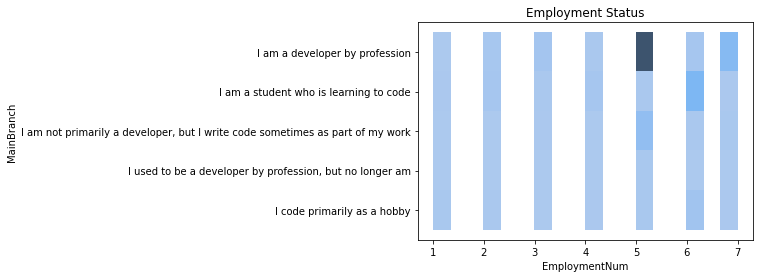

In [38]:
sns.histplot(y='MainBranch',x='EmploymentNum',data=df_employ1).set(title="Employment Status")

In [39]:
print(f' The percentage of Developers by profession (ie {len(df_fullemploy)}) with full-time employment from the survey is {round((len(df_fullemploy)/len(df))*100,2)}%')

 The percentage of Developers by profession (ie 46884) with full-time employment from the survey is 56.19%


Note:

The number of developers that full-time employment are 46,884 developers from the survey. 
Comparing this number to total number of people that did the survey, developers with full-time jobs take 56.19% of the survey.

In [40]:
df.Age1stCode.unique()

array(['18 - 24 years', '11 - 17 years', '5 - 10 years', '25 - 34 years',
       '35 - 44 years', 'Younger than 5 years', '45 - 54 years',
       '55 - 64 years', nan, 'Older than 64 years'], dtype=object)

In [41]:
df_age1st=df[['MainBranch','Age1stCode']]
df_age1st=df_age1st.query('MainBranch !="None of these"')
df_age1st=df_age1st.rename(columns={"Age1stCode":"Age_group_1stCode"})
df_age1st
df_age1st["First_codenum"]=""
df_age1st.head(2)

,MainBranch,Age_group_1stCode,First_codenum
0,I am a developer by profession,18 - 24 years,
1,I am a student who is learning to code,11 - 17 years,


In [42]:
df_age1st=df_age1st.query("Age_group_1stCode !='nan'")
df_age1st.head(2)

,MainBranch,Age_group_1stCode,First_codenum
0,I am a developer by profession,18 - 24 years,
1,I am a student who is learning to code,11 - 17 years,


In [43]:
#Age_group_1stCode={"Older than 64 years":9, "55 - 64 years":8, "45 - 54 years":7, "35 - 44 years":6, "25 - 34 years":5, "18 - 24 years":4, "11 - 17 years":3, "5 - 10 years":2, "Younger than 5 years":0}   

df_age1st['First_codenum']=df_age1st['Age_group_1stCode'].map({"Older than 64 years":9, "55 - 64 years":8, "45 - 54 years":7, "35 - 44 years":6, "25 - 34 years":5, "18 - 24 years":4, "11 - 17 years":3, "5 - 10 years":2, "Younger than 5 years":0})  

df_age1st

,MainBranch,Age_group_1stCode,First_codenum
0,I am a developer by profession,18 - 24 years,4.0
1,I am a student who is learning to code,11 - 17 years,3.0
2,"I am not primarily a developer, but I write co...",11 - 17 years,3.0
3,I am a developer by profession,11 - 17 years,3.0
4,I am a developer by profession,5 - 10 years,2.0
...,...,...,...
83434,I am a developer by profession,11 - 17 years,3.0
83435,I am a developer by profession,11 - 17 years,3.0
83436,I am a developer by profession,11 - 17 years,3.0
83437,I am a developer by profession,11 - 17 years,3.0


<AxesSubplot:xlabel='First_codenum', ylabel='MainBranch'>

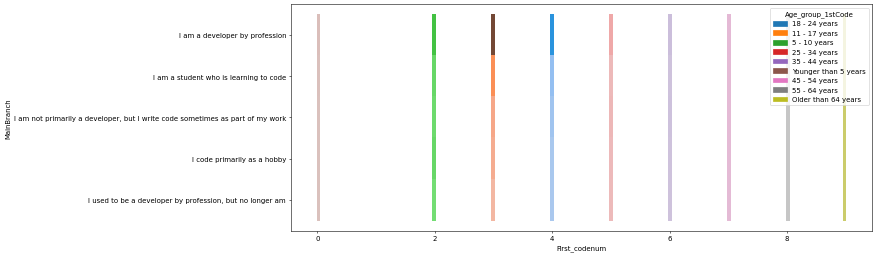

In [45]:

from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=50)


sns.histplot(df_age1st,x='First_codenum',y='MainBranch',hue="Age_group_1stCode",multiple="stack")

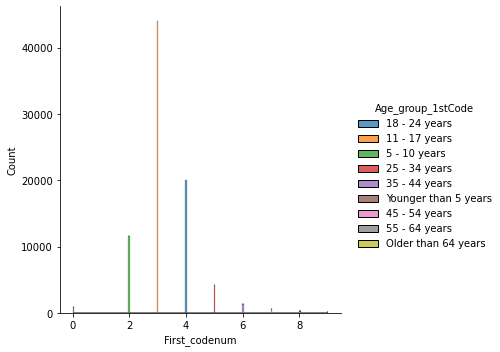

In [46]:
sns.displot(data=df_age1st, x="First_codenum",hue="Age_group_1stCode", multiple="stack")

In [47]:
enquiry_df=df[['MainBranch','Age','Employment']]
enquiry_df

,MainBranch,Age,Employment
0,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em..."
1,I am a student who is learning to code,18-24 years old,"Student, full-time"
2,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time"
3,I am a developer by profession,35-44 years old,Employed full-time
4,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em..."
...,...,...,...
83434,I am a developer by profession,25-34 years old,Employed full-time
83435,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em..."
83436,I am a developer by profession,25-34 years old,Employed full-time
83437,I am a developer by profession,25-34 years old,Employed full-time


<font color='green'>Step 3: Get the statistical data-types
- see https://towardsdatascience.com/an-introduction-to-exploratory-data-analysis-in-python-9a76f04628b8 from ref (2)
- see also https://www.youtube.com/watch?v=hZxnzfnt5v8 @58s-3min20s
- read the doc about the dataset!
</font> 

<font color='green'>Step 4: Get some summary/"moments"
- see https://www.youtube.com/watch?v=hZxnzfnt5v8 @ 58s - 3min20
</font>

<font color='green'>Step 5: Get rid of NAs
- if necessary do that in different ways justified by your data
</font>

<font color='green'>Step 6: Reformat the dataset
- according to fonts, programming language, etc... (parsing step)
- feature extraction such as taking the log, dimensionality reduction techniques such as PCA are typically performed separately
- should actually happen as Step 2.5
</font>

# Analyze

<font color='green'>Step 7: generate basic visualizations/ generate hypotheses

- “The basic general intent of data analysis
is simply stated: to seek through a body of
data for interesting relationships and
information and to exhibit the results in
such a way as to make them recognizable to
the data analyzer and recordable for
posterity" J.W.Tukey (3)
- see also (5), (6)

</font>

In [ ]:
#df.ed_level.isna().sum()/len(df)*100

<font color='green'>Step 8: Quantify, Test, ML, AI, generate comples plots such as PCA loadings plot...
- e.g. https://www.deeplearningbook.org/,
- e.g. https://www.youtube.com/watch?v=rulIUAN0U3w (Fisher's exact test; given certain assumptions it is still unbeatable)
  - multiple testing (Tukey's post-hoc analysis)
  - spurious correlations
</font>

# Review

<font color='green'>**Next**
- Project
- Splunk, PowerBI or Tableau?
- Real World Prisoner dataset
- Fisher's exact test, ...
- supervised vs unsupervised (ML)
</font>
